In [2]:
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import numpy as np

winedata = pd.read_csv("winequality-red.csv", delimiter = ",")
print winedata

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
5               7.4             0.660         0.00             1.8      0.075   
6               7.9             0.600         0.06             1.6      0.069   
7               7.3             0.650         0.00             1.2      0.065   
8               7.8             0.580         0.02             2.0      0.073   
9               7.5             0.500         0.36             6.1      0.071   
10              6.7             0.580         0.08             1.8      0.097   
11              7.5         

In [3]:
winedata.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


AxesSubplot(0.125,0.125;0.775x0.755)


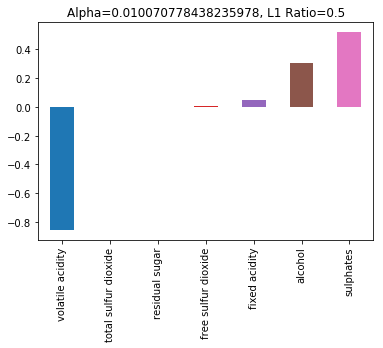

In [6]:
from sklearn.model_selection import train_test_split
xprep = winedata.drop('quality',1)
x_train, x_cv, y_train, y_cv = train_test_split(xprep,winedata.quality, test_size =0.3)

from sklearn.linear_model import ElasticNetCV
encv = ElasticNetCV()
encv.fit(x_train, y_train)

predictors = x_train.columns
coef = Series(encv.coef_,predictors).sort_values()
coef=coef[coef!=0]
print coef.plot(kind='bar', title='Alpha='+str(encv.alpha_)+', L1 Ratio='+str(encv.l1_ratio_))


Training RMSEA: 0.6621774636539178
Testing RMSEA: 0.6384517752550527
difference = -0.02372568839886513


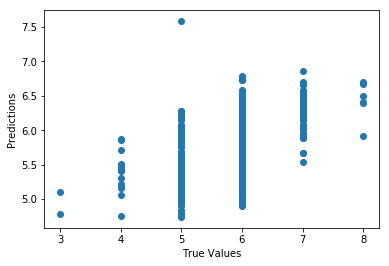

In [7]:
predictions = encv.predict(x_train)
mse = np.mean((predictions - y_train)**2)
tr=np.sqrt(mse)
print "Training RMSEA: "+str(tr)

#and here's how accurate on the testing data
predictions = encv.predict(x_cv)
mse = np.mean((predictions - y_cv)**2)
ts=np.sqrt(mse)
print "Testing RMSEA: "+str(ts)
print "difference = "+str(ts-tr)

plt.scatter(y_cv, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()

In [29]:
from scipy import stats
winedatanew = winedata[(np.abs(stats.zscore(winedata)) <= 3).all(axis=1)]
print winedatanew

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
5               7.4             0.660         0.00             1.8      0.075   
6               7.9             0.600         0.06             1.6      0.069   
7               7.3             0.650         0.00             1.2      0.065   
8               7.8             0.580         0.02             2.0      0.073   
9               7.5             0.500         0.36             6.1      0.071   
10              6.7             0.580         0.08             1.8      0.097   
11              7.5         

AxesSubplot(0.125,0.125;0.775x0.755)


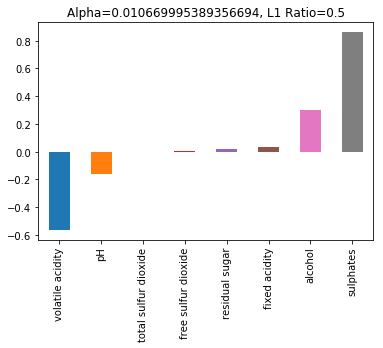

In [31]:
xprep = winedatanew.drop('quality',1)
x_train, x_cv, y_train, y_cv = train_test_split(xprep,winedatanew.quality, test_size =0.3)

encv = ElasticNetCV()
encv.fit(x_train, y_train)

predictors = x_train.columns
coef = Series(encv.coef_,predictors).sort_values()
coef=coef[coef!=0]
print coef.plot(kind='bar', title='Alpha='+str(encv.alpha_)+', L1 Ratio='+str(encv.l1_ratio_))



Training RMSEA: 0.6346731174557071
Testing RMSEA: 0.5944881739585056
difference = -0.040184943497201475


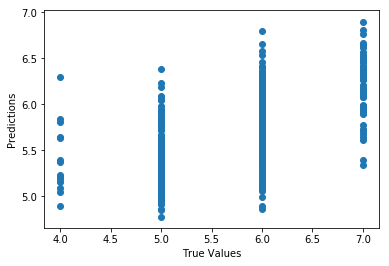

In [32]:
predictions = encv.predict(x_train)
mse = np.mean((predictions - y_train)**2)
tr=np.sqrt(mse)
print "Training RMSEA: "+str(tr)


predictions = encv.predict(x_cv)
mse = np.mean((predictions - y_cv)**2)
ts=np.sqrt(mse)
print "Testing RMSEA: "+str(ts)
print "difference = "+str(ts-tr)

plt.scatter(y_cv, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()

In [33]:
# The RMSE of our testing data went down. 
# The gap between RMSE of training and testing went down as well. 

AxesSubplot(0.125,0.125;0.775x0.755)


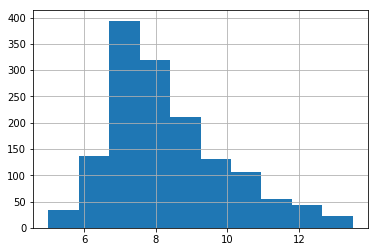

In [34]:
print winedatanew["fixed acidity"].hist()

AxesSubplot(0.125,0.125;0.775x0.755)


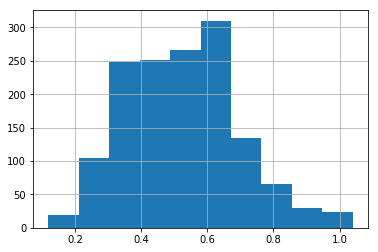

In [35]:
print winedatanew["volatile acidity"].hist()

AxesSubplot(0.125,0.125;0.775x0.755)


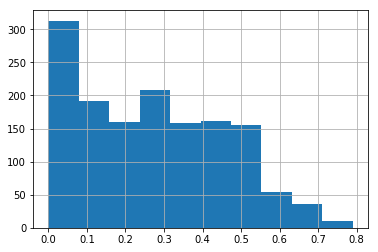

In [36]:
print winedatanew["citric acid"].hist()

AxesSubplot(0.125,0.125;0.775x0.755)


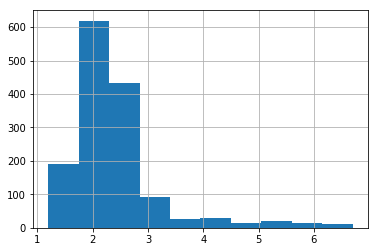

In [37]:
print winedatanew["residual sugar"].hist()

AxesSubplot(0.125,0.125;0.775x0.755)


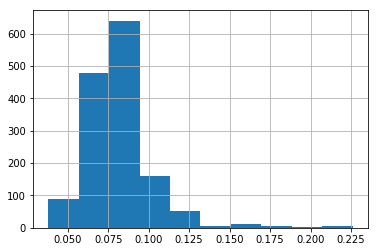

In [38]:
print winedatanew["chlorides"].hist()

AxesSubplot(0.125,0.125;0.775x0.755)


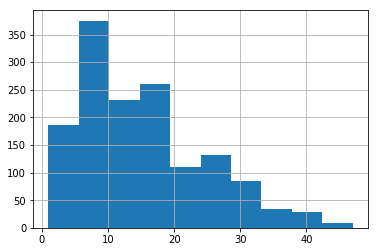

In [39]:
print winedatanew["free sulfur dioxide"].hist()

AxesSubplot(0.125,0.125;0.775x0.755)


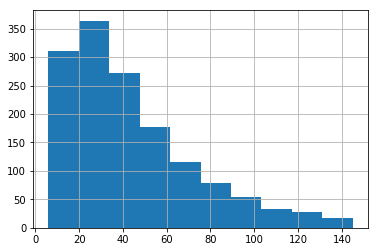

In [40]:
print winedatanew["total sulfur dioxide"].hist()

AxesSubplot(0.125,0.125;0.775x0.755)


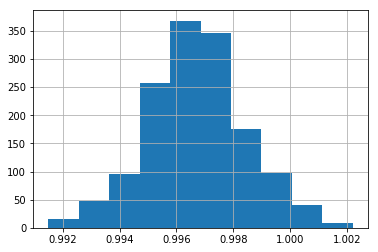

In [41]:
print winedatanew["density"].hist()

AxesSubplot(0.125,0.125;0.775x0.755)


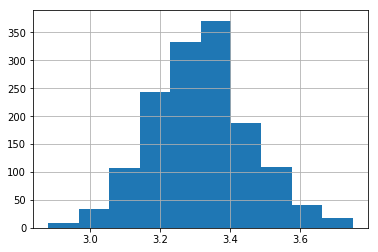

In [42]:
print winedatanew["pH"].hist()

AxesSubplot(0.125,0.125;0.775x0.755)


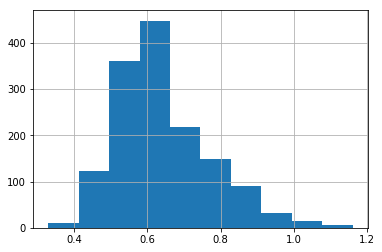

In [44]:
print winedatanew["sulphates"].hist()

AxesSubplot(0.125,0.125;0.775x0.755)


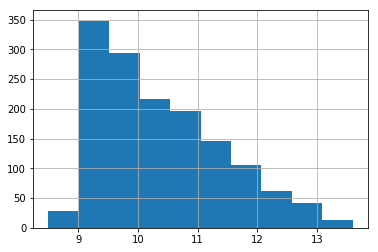

In [46]:
print winedatanew["alcohol"].hist()

AxesSubplot(0.125,0.125;0.775x0.755)


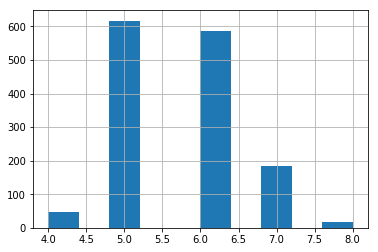

In [47]:
print winedatanew["quality"].hist()

C:\Users\Y\Anaconda2\CIS325\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


AxesSubplot(0.125,0.125;0.775x0.755)


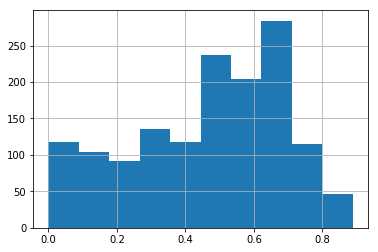

In [51]:
# Citric Acid Transformation
winedatanew["citricacid_sqrt"]=np.sqrt(winedatanew["citric acid"])
print winedatanew["citricacid_sqrt"].hist()

C:\Users\Y\Anaconda2\CIS325\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


AxesSubplot(0.125,0.125;0.775x0.755)


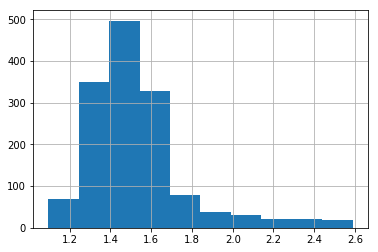

In [53]:
# Residual Sugar Transformation
winedatanew["residualsugar_sqrt"]=np.sqrt(winedatanew["residual sugar"])
print winedatanew["residualsugar_sqrt"].hist()

C:\Users\Y\Anaconda2\CIS325\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


AxesSubplot(0.125,0.125;0.775x0.755)


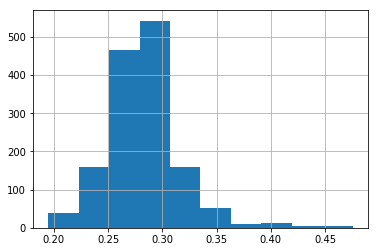

In [55]:
# Chlorides Transformation
winedatanew["chlorides_sqrt"]=np.sqrt(winedatanew["chlorides"])
print winedatanew["chlorides_sqrt"].hist()

AxesSubplot(0.125,0.125;0.775x0.755)


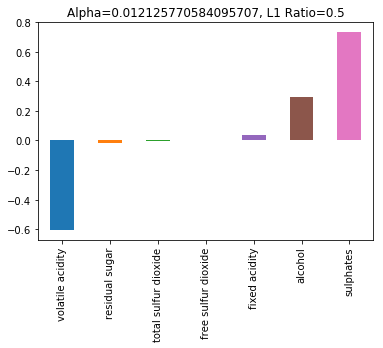

In [56]:
xprep = winedatanew.drop('quality',1)
x_train, x_cv, y_train, y_cv = train_test_split(xprep,winedatanew.quality, test_size =0.3)

encv = ElasticNetCV()
encv.fit(x_train, y_train)

predictors = x_train.columns
coef = Series(encv.coef_,predictors).sort_values()
coef=coef[coef!=0]
print coef.plot(kind='bar', title='Alpha='+str(encv.alpha_)+', L1 Ratio='+str(encv.l1_ratio_))



Training RMSEA: 0.6221017256984722
Testing RMSEA: 0.6335467605522808
difference = 0.011445034853808544


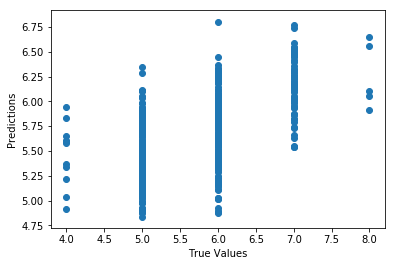

In [57]:
predictions = encv.predict(x_train)
mse = np.mean((predictions - y_train)**2)
tr=np.sqrt(mse)
print "Training RMSEA: "+str(tr)


predictions = encv.predict(x_cv)
mse = np.mean((predictions - y_cv)**2)
ts=np.sqrt(mse)
print "Testing RMSEA: "+str(ts)
print "difference = "+str(ts-tr)

plt.scatter(y_cv, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()

In [58]:
# The RMSE did not go down of the testing data
# The The gap between them did not go down as well

In [ ]:
# The most important variables appear to be sulphates, fixed acididty, alcohol level. 
# They have a positive impact on wine quality. 
# Our model appears to be accurate to within 0.63 units of quality by using the value of testing RMSE to find wine quality. 